In [1]:
from scipy import stats
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df_sheet_all = pd.read_excel('Weatherdata.xlsx', sheet_name=None)
df=df_sheet_all['Apr2022']

In [3]:
for key in list(df_sheet_all):
    df=pd.concat([df,df_sheet_all[key]])

In [4]:
df=df.reset_index()

In [5]:
df.drop('index',axis=1,inplace=True)

In [6]:
df.drop('Precipitation',axis=1,inplace=True)

In [7]:
df.head()

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2022-04-01,87.9,31.3,13.4,5.7,29.2,19.010857
1,2022-04-02,91.8,33.0,14.7,5.1,27.7,20.749143
2,2022-04-03,90.2,34.0,14.2,6.6,29.1,16.885714
3,2022-04-04,93.2,31.4,11.8,8.8,29.1,19.627429
4,2022-04-05,92.5,24.9,9.4,8.0,29.1,18.929429


In [8]:
df.describe()

,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,81.475592,36.956161,23.745735,10.268957,29.147038,24.457933
std,13.771127,9.106326,11.092818,3.952997,0.284596,7.561910
min,49.500000,8.700000,7.000000,4.400000,26.900000,8.581429
25%,70.525000,30.025000,15.525000,8.300000,29.100000,17.687714
50%,84.600000,37.350000,20.550000,10.100000,29.200000,23.597714
75%,93.200000,44.000000,29.600000,12.000000,29.300000,31.817429
max,102.700000,63.900000,63.000000,72.900000,29.600000,40.038857


In [9]:
df.isna().sum()

Date          0
AvgTemp       0
AverageDew    0
Humidity      0
Wind          0
Pressure      0
Solar(PV)     0
dtype: int64

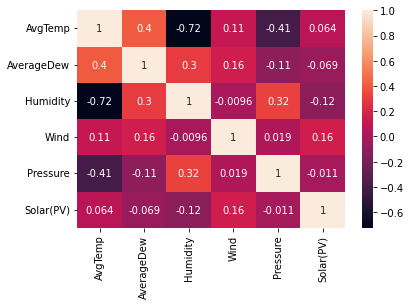

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.savefig('heatmap.png')

In [11]:
df_box=df.drop('Pressure',axis=1)

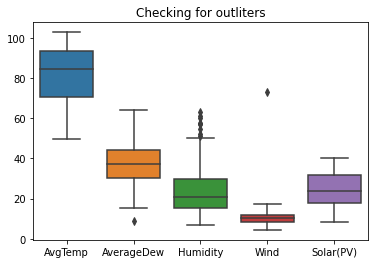

In [12]:
sns.boxplot(data=df_box)
plt.title('Checking for outliters')
plt.savefig('boxplot1.png')

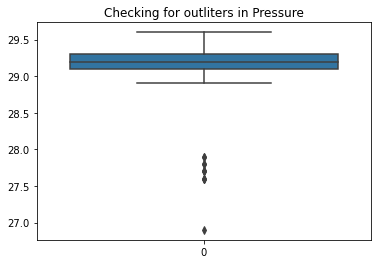

In [13]:
sns.boxplot(data=df.Pressure)
plt.title('Checking for outliters in Pressure')
plt.savefig('boxplot2.png')

In [14]:
df=df[df.Wind<20]

In [15]:
df=df[df.AverageDew>15]

In [16]:
df=df[df.Pressure>28.5]

In [17]:
df=df[df.Humidity<49]

In [18]:
df.to_csv('weaterdata.csv')

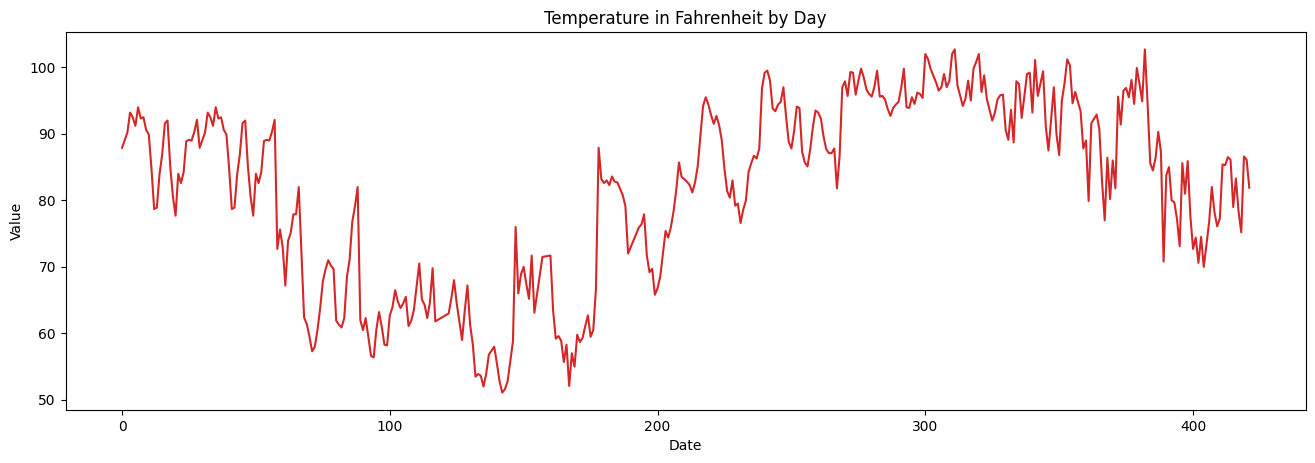

In [19]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,color='tab:red'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Wind.png')
    plt.show()

plot_df(df, x=df.index, y=df.AvgTemp, title='Temperature in Fahrenheit by Day')   


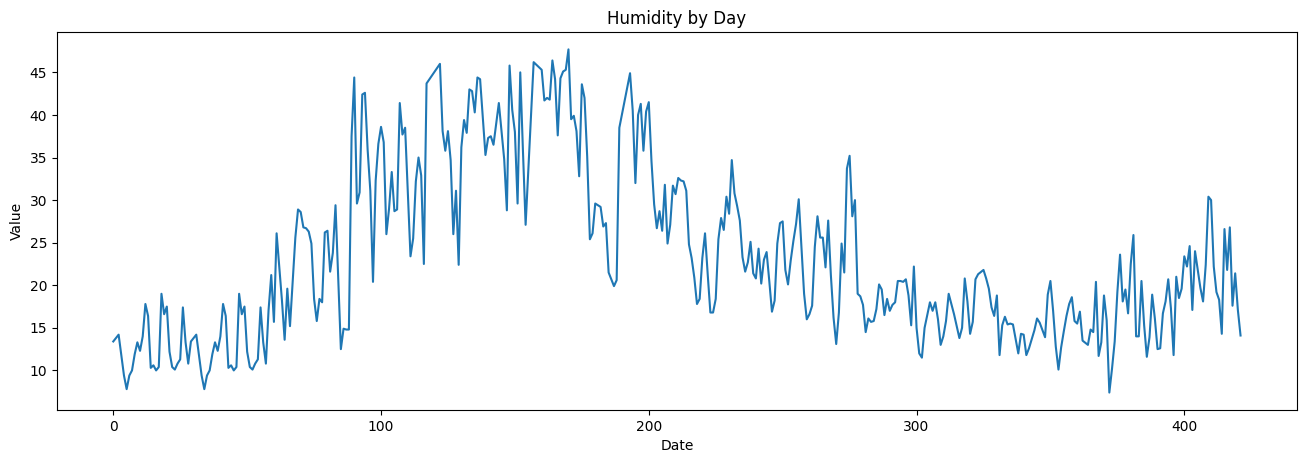

In [20]:
plot_df(df, x=df.index, y=df.Humidity, title='Humidity by Day',color='tab:blue')   

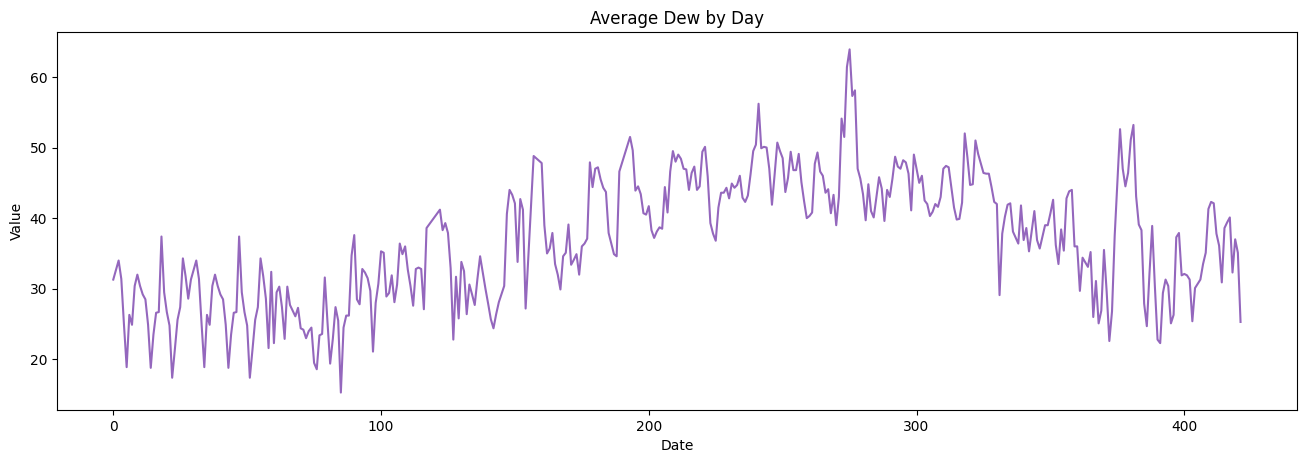

In [21]:
plot_df(df, x=df.index, y=df.AverageDew, title='Average Dew by Day',color='tab:purple')   

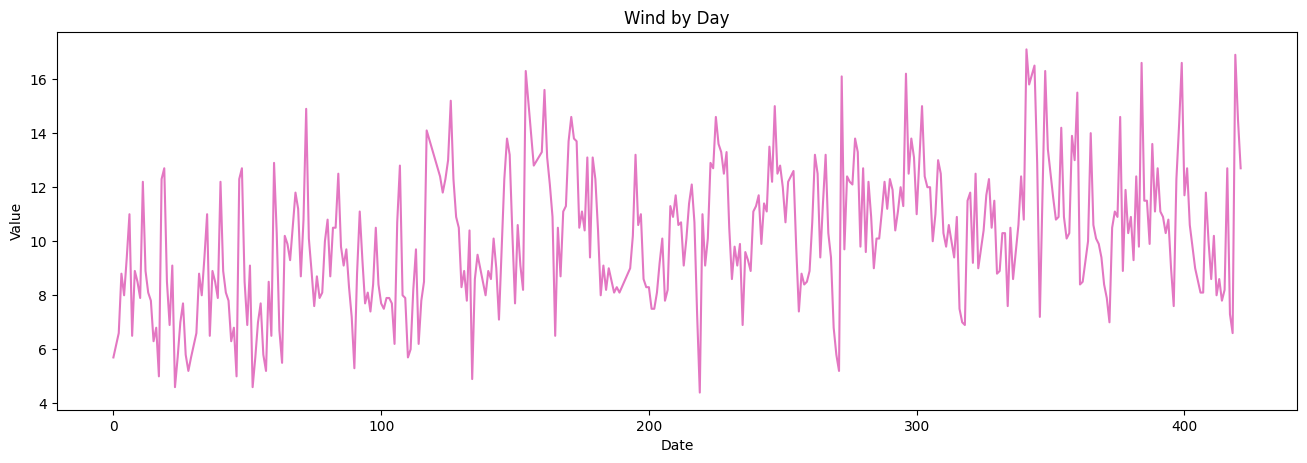

In [22]:
plot_df(df, x=df.index, y=df.Wind, title='Wind by Day',color='tab:pink')   

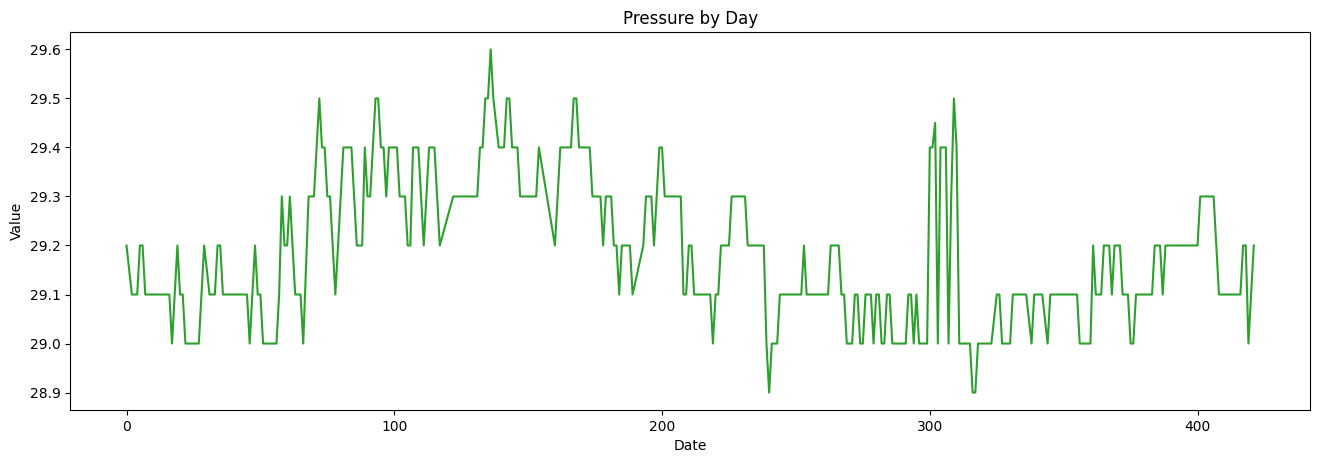

In [23]:
plot_df(df, x=df.index, y=df.Pressure, title='Pressure by Day',color='tab:green')   

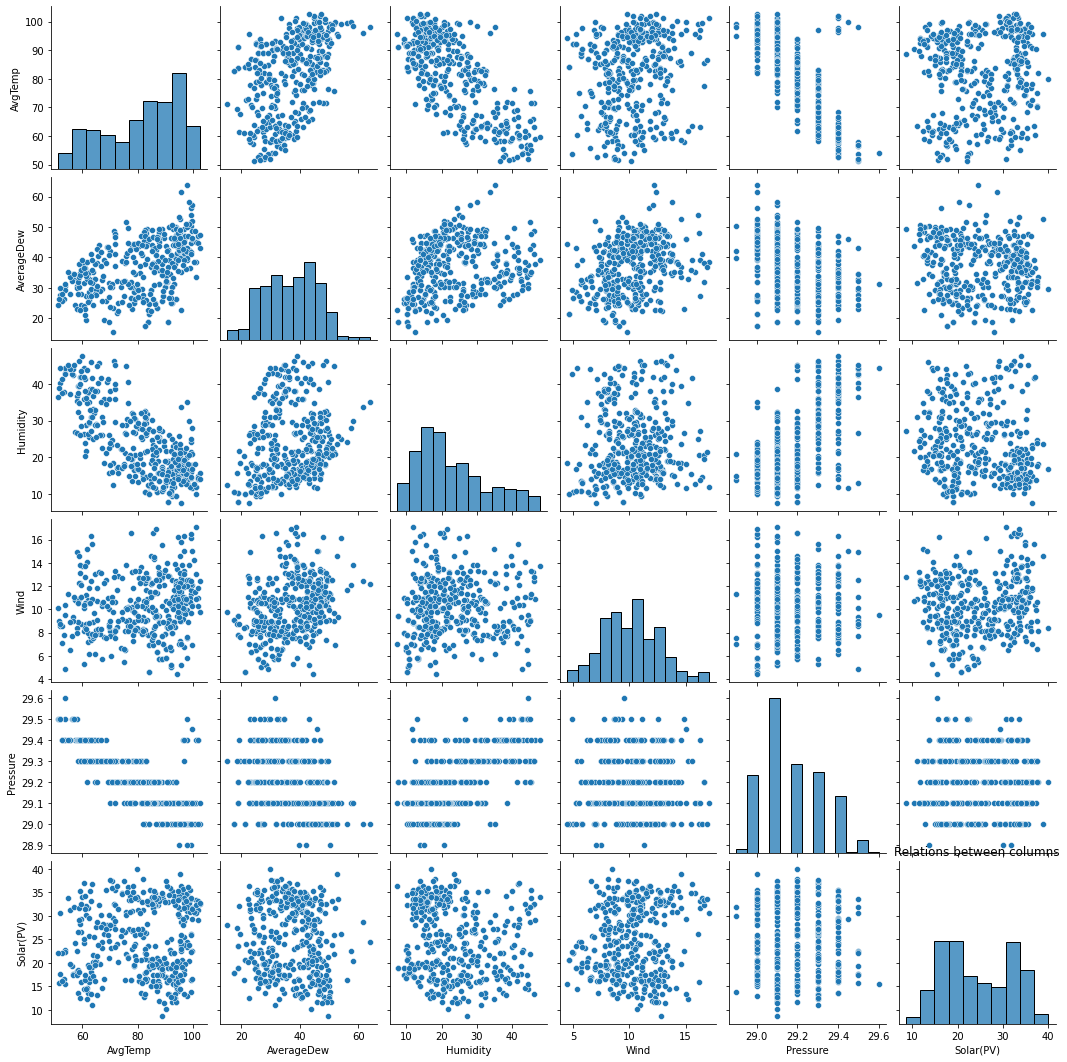

In [24]:
sns.pairplot(df)
plt.title('Relations between columns')
plt.savefig('Pair.png')

In [25]:
df['month'] = [d.strftime('%b') for d in df.Date]
df['year'] = [d.year for d in df.Date]
years = df['year'].unique()

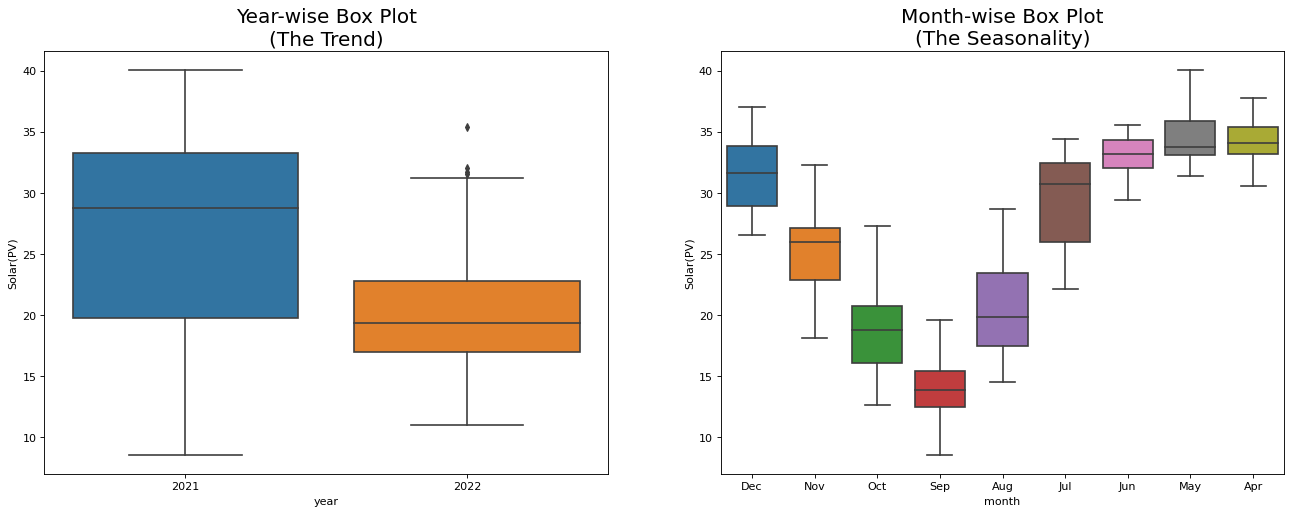

In [26]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Solar(PV)', data=df, ax=axes[0])
sns.boxplot(x='month', y='Solar(PV)', data=df.loc[~df.year.isin([2022]), :])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.savefig('TrendandSeasonality.png')

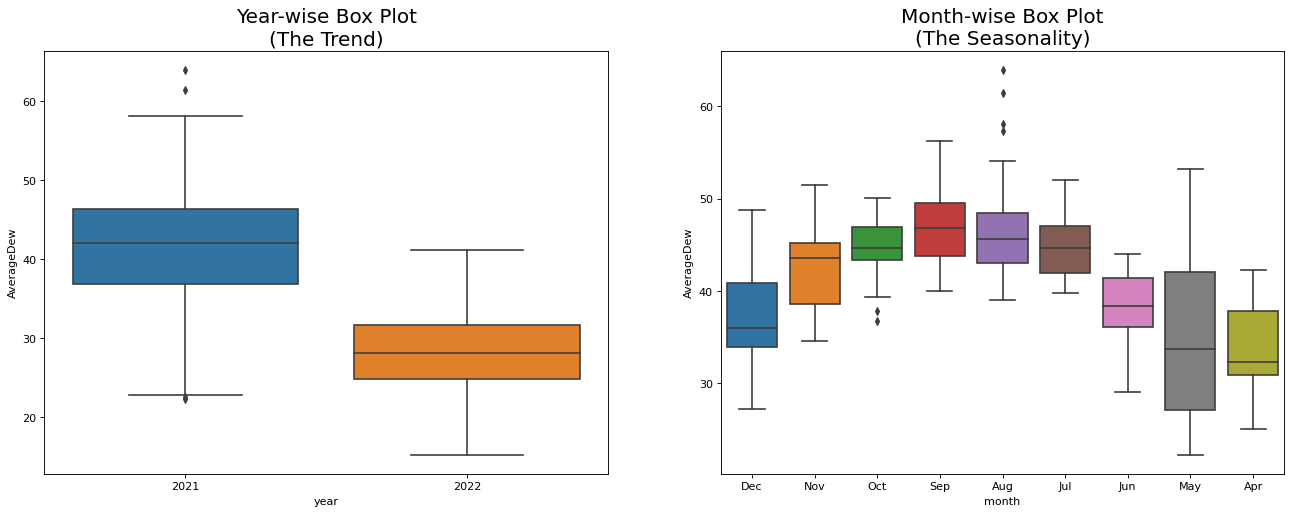

In [27]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='AverageDew', data=df, ax=axes[0])
sns.boxplot(x='month', y='AverageDew', data=df.loc[~df.year.isin([2022]), :])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.savefig('TrendandSeasonality.png')

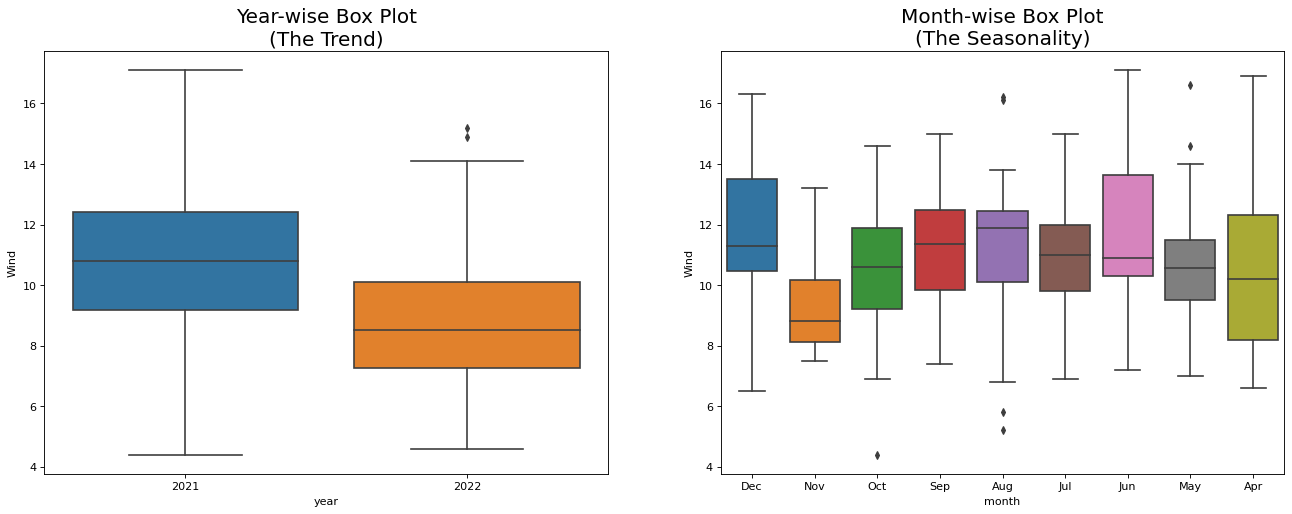

In [28]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Wind', data=df, ax=axes[0])
sns.boxplot(x='month', y='Wind', data=df.loc[~df.year.isin([2022]), :])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.savefig('TrendandSeasonality.png')

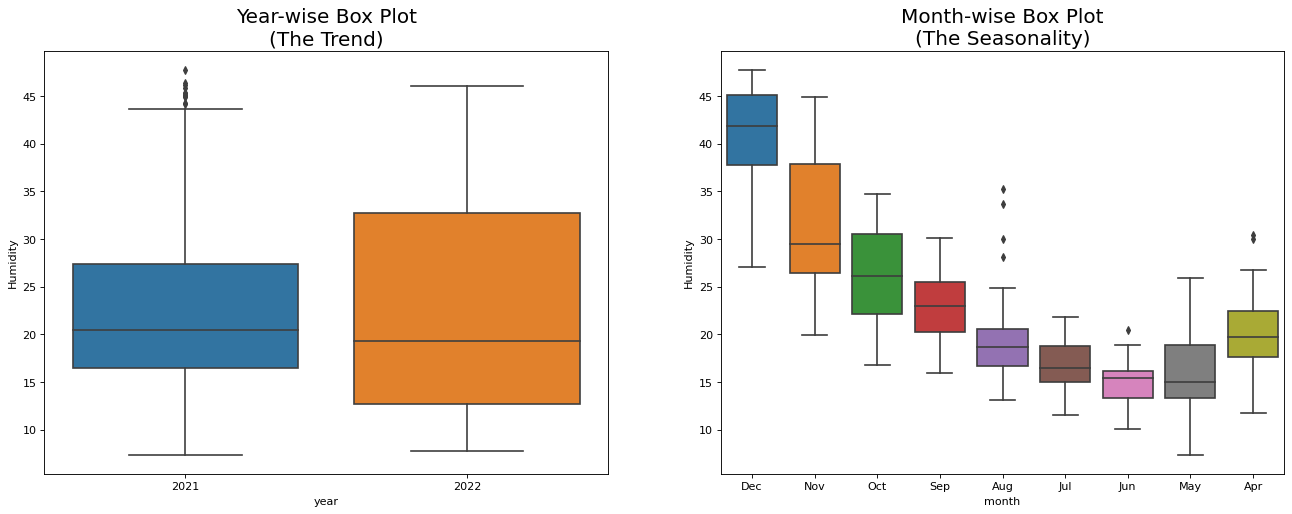

In [29]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Humidity', data=df, ax=axes[0])
sns.boxplot(x='month', y='Humidity', data=df.loc[~df.year.isin([2022]), :])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.savefig('TrendandSeasonality.png')

<AxesSubplot:xlabel='month', ylabel='Solar(PV)'>

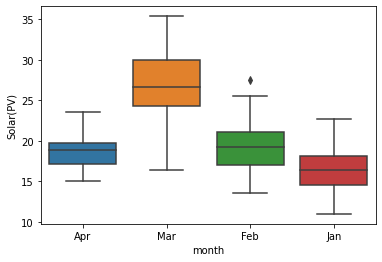

In [30]:
sns.boxplot(x='month', y='Solar(PV)', data=df.loc[~df.year.isin([2021]), :])

<AxesSubplot:xlabel='month', ylabel='AvgTemp'>

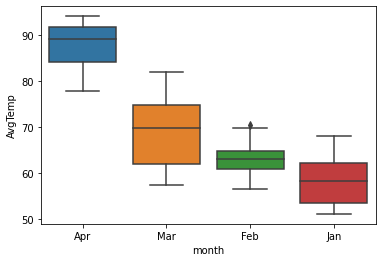

In [31]:
sns.boxplot(x='month', y='AvgTemp', data=df.loc[~df.year.isin([2021]), :])

<AxesSubplot:xlabel='month', ylabel='Humidity'>

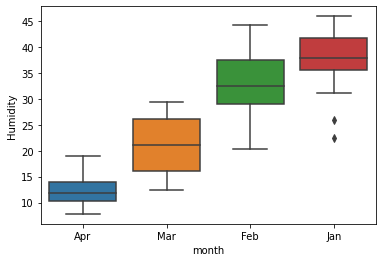

In [32]:
sns.boxplot(x='month', y='Humidity', data=df.loc[~df.year.isin([2021]), :])

<AxesSubplot:xlabel='month', ylabel='Pressure'>

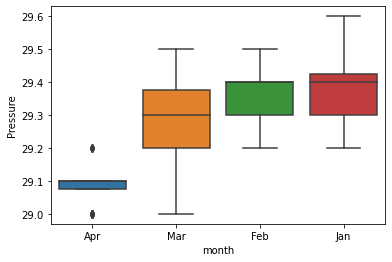

In [33]:
sns.boxplot(x='month', y='Pressure', data=df.loc[~df.year.isin([2021]), :])

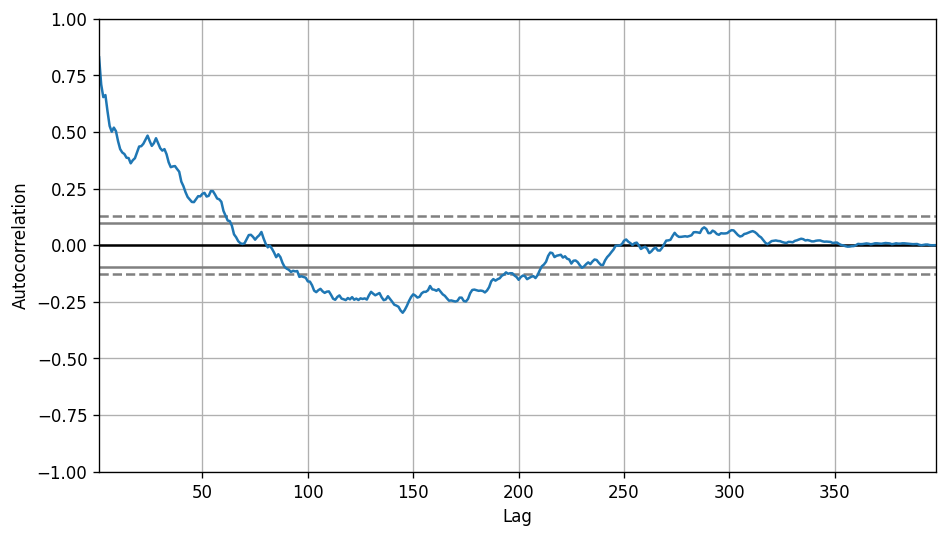

In [34]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Pressure'].tolist())
plt.savefig('Autocorrelation.png')

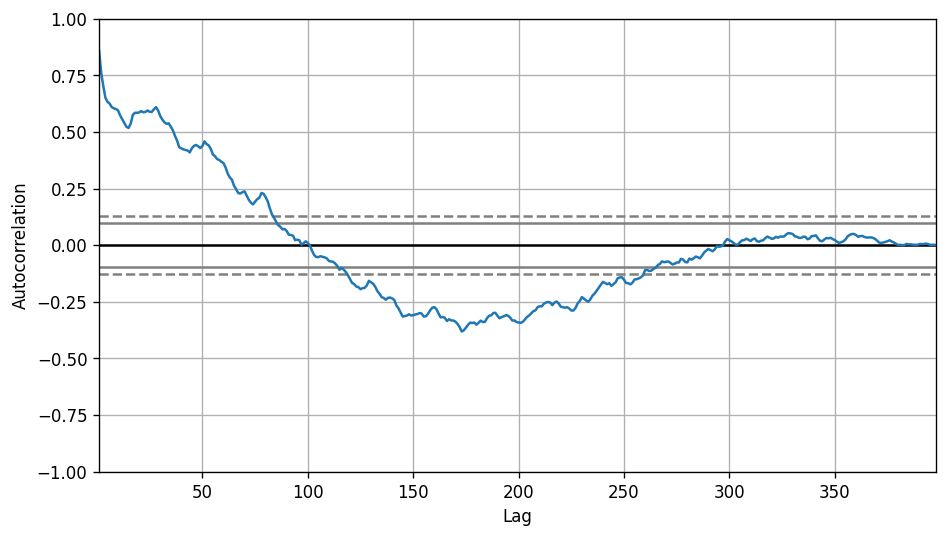

In [35]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['AverageDew'].tolist())
plt.savefig('Autocorrelation.png')

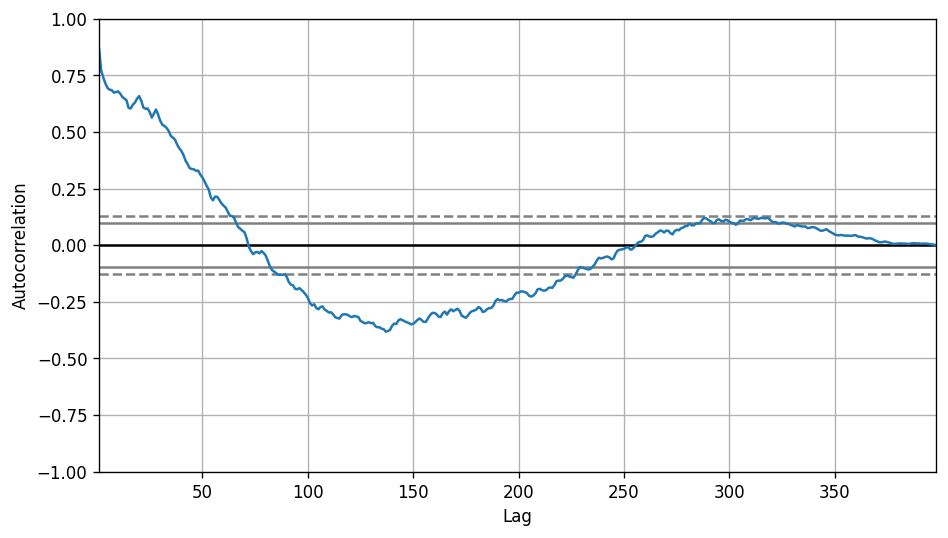

In [36]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Humidity'].tolist())
plt.savefig('Autocorrelation.png')

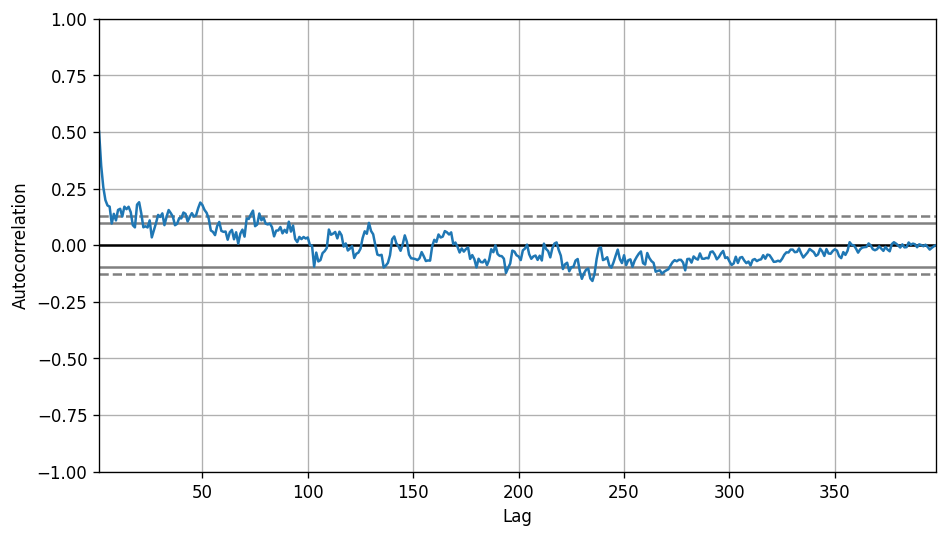

In [37]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Wind'].tolist())
plt.savefig('Autocorrelation.png')

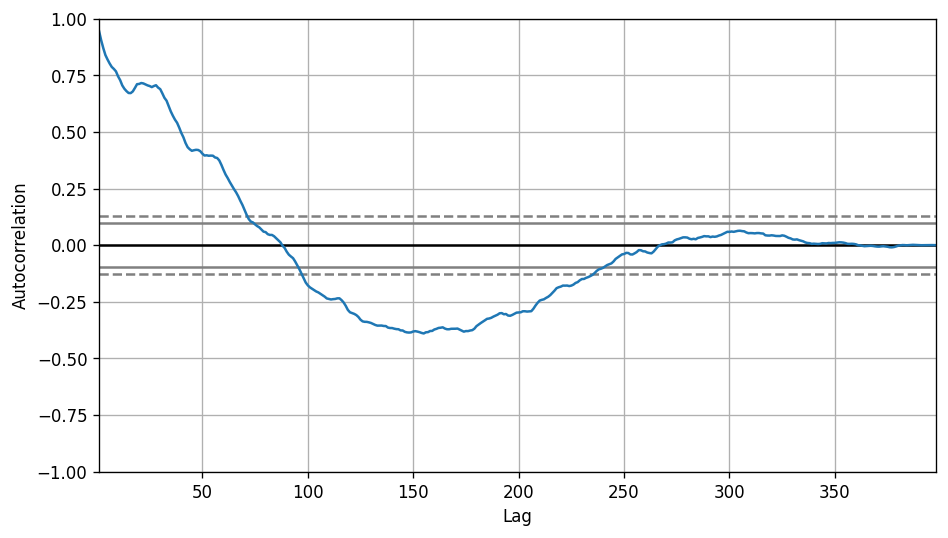

In [38]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['AvgTemp'].tolist())
plt.savefig('Autocorrelation.png')

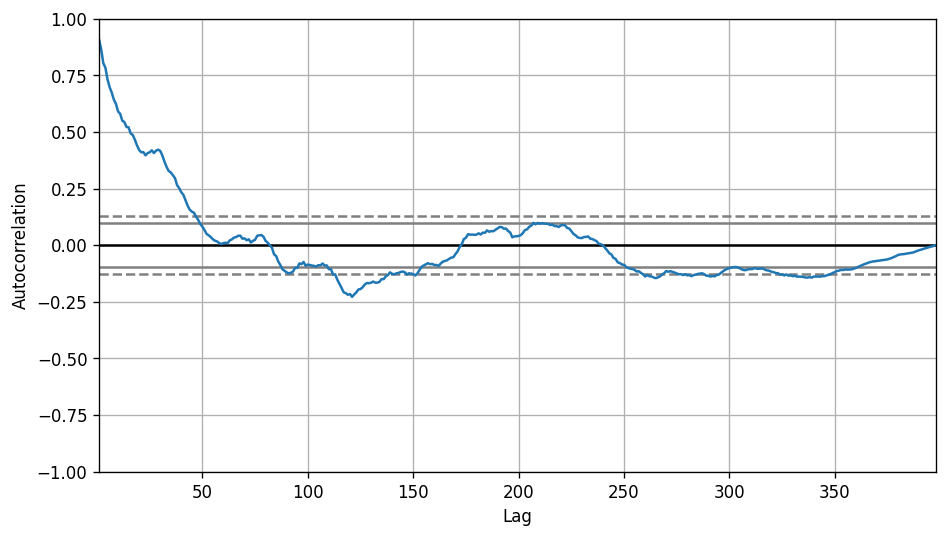

In [39]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Solar(PV)'].tolist())
plt.savefig('Autocorrelation.png')

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Solar(PV)'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.3628575179849975
p-value: 0.15249510943346867
Critial Values:
   1%, -3.447272819026727
Critial Values:
   5%, -2.868998737588248
Critial Values:
   10%, -2.5707433189709294


In [41]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['AvgTemp'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.2301420569935324
p-value: 0.660496852116303
Critial Values:
   1%, -3.4476763783532585
Critial Values:
   5%, -2.869176103659426
Critial Values:
   10%, -2.570837873961219


In [42]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['AverageDew'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6943186896117401
p-value: 0.4340420106048205
Critial Values:
   1%, -3.4476305904172904
Critial Values:
   5%, -2.869155980820355
Critial Values:
   10%, -2.570827146203181


In [43]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Pressure'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.9884610964547638
p-value: 0.03598613045517292
Critial Values:
   1%, -3.4472291365835566
Critial Values:
   5%, -2.8689795375849223
Critial Values:
   10%, -2.5707330834976987


In [44]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Wind'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.65307580646117
p-value: 5.053588809600529e-14
Critial Values:
   1%, -3.4469717056192213
Critial Values:
   5%, -2.868866381945153
Critial Values:
   10%, -2.570672761197837


In [45]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Humidity'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9685513735283409
p-value: 0.30053012710827215
Critial Values:
   1%, -3.4473167281607155
Critial Values:
   5%, -2.869018036958473
Critial Values:
   10%, -2.5707536074503134


# ML

In [46]:
y=df['Solar(PV)']

In [52]:
x=df.drop(['Solar(PV)'],axis=1)

In [50]:
df['Date']=df.apply(lambda x:x['Date'].toordinal(),axis=1)

In [54]:
x=x.drop(['month','year'],axis=1)

In [55]:
x

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure
0,738246,87.9,31.3,13.4,5.7,29.2
2,738248,90.2,34.0,14.2,6.6,29.1
3,738249,93.2,31.4,11.8,8.8,29.1
4,738250,92.5,24.9,9.4,8.0,29.1
5,738251,91.2,18.9,7.8,9.4,29.2
...,...,...,...,...,...,...
417,737906,78.3,40.1,26.8,7.3,29.2
418,737907,75.2,32.3,17.6,6.6,29.2
419,737908,86.6,37.0,21.4,16.9,29.0
420,737909,86.1,35.1,17.1,14.5,29.1


In [66]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# SVR

In [77]:
from sklearn.svm import SVR

In [78]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [80]:
 regr.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [81]:
y_pred3=regr.predict(x)

In [82]:
mse(y_pred3,y)

22.007546036265126

In [83]:
r2_score(y_pred3,y)

0.103831155627792

# KNNRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x,y)

KNeighborsRegressor(n_neighbors=2)

In [86]:
y_pred4=neigh.predict(x)

In [87]:
r2_score(y_pred4,y)

0.9568789651851153

In [88]:
mse(y_pred4,y)

2.299477492872526

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}
forest = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(forest,parameters,cv=5)
cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [90]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [91]:
display(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 5}


0.054 + or -0.391 for the {'max_depth': 2, 'n_estimators': 5}
0.05 + or -0.362 for the {'max_depth': 2, 'n_estimators': 10}
0.028 + or -0.377 for the {'max_depth': 2, 'n_estimators': 50}
0.022 + or -0.395 for the {'max_depth': 2, 'n_estimators': 100}
0.03 + or -0.376 for the {'max_depth': 2, 'n_estimators': 250}
-0.106 + or -0.53 for the {'max_depth': 4, 'n_estimators': 5}
-0.361 + or -0.948 for the {'max_depth': 4, 'n_estimators': 10}
-0.323 + or -0.833 for the {'max_depth': 4, 'n_estimators': 50}
-0.348 + or -0.866 for the {'max_depth': 4, 'n_estimators': 100}
-0.316 + or -0.818 for the {'max_depth': 4, 'n_estimators': 250}
-0.634 + or -1.327 for the {'max_depth': 8, 'n_estimators': 5}
-0.596 + or -1.213 for the {'max_depth': 8, 'n_estimators': 10}
-0.444 + or -1.114 for the {'max_depth': 8, 'n_estimators': 50}
-0.665 + or -1.45 for the {'max_depth': 8, 'n_estimators': 100}
-0.574 + or -1.289 for the {'max_depth': 8, 'n_estim

In [92]:
forest=RandomForestRegressor(max_depth=2,n_estimators=5,random_state=0)
forest.fit(x, y)

RandomForestRegressor(max_depth=2, n_estimators=5, random_state=0)

In [93]:
y_pred5=forest.predict(x)

In [94]:
r2_score(y_pred5,y)

0.430220145041863

In [95]:
mse(y_pred5,y)

20.929271853850803

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x, y)
y_pred6=reg.predict(x)

In [97]:
r2_score(y_pred6,y)

0.9543253879330922

In [98]:
mse(y_pred6,y)

2.268223951788859

# Polynomial regression

In [122]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9, include_bias=False)
poly_features = poly.fit_transform(x)


In [123]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)


LinearRegression()

In [124]:
y_predicted = poly_reg_model.predict(poly_features)


In [125]:
r2_score(y,y_predicted)

0.6959751753767838

In [126]:
mse(y,y_predicted)

17.09283775979238

# Lasso

In [127]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [128]:
lass=Lasso()
lass.fit(x,y)

Lasso()

In [129]:
y_pred_lass=lass.predict(x)

In [130]:
r2_score(y_pred_lass,y)

-0.28143830315133345

In [131]:
mse(y_pred_lass,y)

30.9986491157756

# Ridge

In [132]:
ridge=Ridge()
ridge.fit(x,y)

Ridge()

In [133]:
y_pred_ridge=ridge.predict(x)

In [134]:
r2_score(y_pred_ridge,y)

-0.19227049196051116

In [135]:
mse(y_pred_ridge,y)

30.540881950559957

# Elastic

In [136]:
elastic=ElasticNet()
elastic.fit(x,y)

ElasticNet()

In [137]:
y_pred_elastic=elastic.predict(x)

In [138]:
r2_score(y_pred_elastic,y)

-0.25870359029063206

In [139]:
mse(y_pred_elastic,y)

30.917580612680606

# PCR AND PLS

In [140]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(x, y)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(x,y)

PLSRegression(n_components=1)

In [141]:
y_pred_pcr=pcr.predict(x)
y_pred_pls=pls.predict(x)

In [142]:
mse(y_pred_pcr,y)

54.992065764057735

In [143]:
r2_score(y_pred_pcr,y)

-43.71687973559217

In [144]:
mse(y_pred_pls,y)

39.75105032125868

In [145]:
r2_score(y_pred_pls,y)

-1.4134258012991672

# Qunatile

In [146]:
from sklearn.linear_model import QuantileRegressor
quantiles = [0.05,0.25, 0.5,0.75, 0.95]

In [147]:
predictions = {}

In [148]:
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(x, y).predict(x)
    predictions[quantile] = y_pred

C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\sklearn\linear_model\_quantile.py:270: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 1: Iteration limit reached.
Result message of linprog:
The iteration limit was reached before the algorithm converged.
  warnings.warn(
C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\sklearn\linear_model\_quantile.py:255: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  result = linprog(
C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\sklearn\linear_model\_quantile.py:270: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
Numerical difficulties were encountered before the pro

In [149]:
for key,value in predictions.items():
    print('R2 score')
    print(r2_score(value,y))
    print('MSE equal')
    print(mse(value,y))

R2 score
-0.1296483189496307
MSE equal
3.064450460614728e+62
R2 score
-0.0588096899891295
MSE equal
9.338136926393885e+68
R2 score
-0.0035895262667162697
MSE equal
1.611649540489017e+65
R2 score
-1.1448133969587455
MSE equal
6.507593703364779e+45
R2 score
-0.025914619226042213
MSE equal
1.2971843834551212e+61


In [294]:
#MLP

In [ ]:
#RNN